In [1]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Видео поток
# ipython notebook должен лежать в папке с картинками

videoCapture = cv2.VideoCapture("%02d.tif")

In [3]:
# Считывание кадра

def readFrame(videoCapture):
    retVal, frame = videoCapture.read()
    if retVal == False:
        return False, None
    else:
        # Так как видео уже в grayscale, то нужно просто дропнуть лишние каналы
        frameGray, _, _ = cv2.split(frame)
        return True, frameGray

In [4]:
# SHI TOMASI

shiTomasiDetector = cv2.FeatureDetector_create("GFTT")
descriptor = cv2.DescriptorExtractor_create('FREAK')
def shitomasi(frame):
    kp = shiTomasiDetector.detect(frame)
    return descriptor.compute(frame, kp)

In [5]:
# BRISK

briskDetector = cv2.FeatureDetector_create("BRISK")
def brisk(frame):
    kp = briskDetector.detect(frame)
    return descriptor.compute(frame, kp)

In [6]:
# SIFT

siftDetector = cv2.FeatureDetector_create("SIFT")
def sift(frame):
    kp = siftDetector.detect(frame)
    return descriptor.compute(frame, kp)

In [7]:
# Save Keypoints to image

def save(keypoints, label, frame, frameIdx):
    img = cv2.drawKeypoints(frame, keypoints, 0, color=(0,255,0), flags=0)
    cv2.imwrite(label + "/" + str(frameIdx) + ".png", img)

In [8]:
shitomasiLabel = "shitomasi"
briskLabel = "brisk"
siftLabel = "sift"

In [9]:
# Брутфорс матчер

matcher = cv2.BFMatcher()
def ratioOfMatchingDescriptors(desc1, desc2):
    matches = matcher.match(desc1, desc2)
    return float(len(matches)) / float(len(desc1) + len(desc2))

# Рисуем графички

def createPlotFromAllDescriptors(allDesc1, allDesc2, label):
    N = len(allDesc1)
    
    ratios = [ratioOfMatchingDescriptors(d1, d2) for d1, d2 in zip(allDesc1, allDesc2)]
    
    print(ratios)
    
    plt.plot(range(1, N + 1), ratios)
    plt.ylabel(label)
    plt.xlabel('frame')
    plt.axis([1, 12, 0.0, 1.0])
    plt.show()

In [10]:
def processFrames(videoCapture):
    shitomasiAllDesc = []
    briskAllDesc = []
    siftAllDesc = []
    
    idx = 0
    while(True):
        idx += 1
        retVal, frame = readFrame(videoCapture)
        if retVal == False:
            break
        
        shitomasiKP, shitomasiDesc = shitomasi(frame)
        save(shitomasiKP, shitomasiLabel, frame, idx)
        
        briskKP, briskDesc = brisk(frame)
        save(briskKP, briskLabel, frame, idx)
        
        siftKP, siftDesc = sift(frame)
        save(siftKP, siftLabel, frame, idx)
        
        shitomasiAllDesc.append(shitomasiDesc)
        briskAllDesc.append(briskDesc)
        siftAllDesc.append(siftDesc)
        
    createPlotFromAllDescriptors(shitomasiAllDesc, briskAllDesc, shitomasiLabel + '-' + briskLabel)
    createPlotFromAllDescriptors(shitomasiAllDesc, siftAllDesc, shitomasiLabel + '-' + siftLabel)
    createPlotFromAllDescriptors(siftAllDesc, briskAllDesc, siftLabel + '-' + briskLabel)

[0.6772727272727272, 0.6910377358490566, 0.6992665036674817, 0.6996197718631179, 0.6946182728410513, 0.6846733668341709, 0.7107652399481194, 0.6769420468557337, 0.6740196078431373, 0.7032679738562092, 0.7218543046357616, 0.70875]


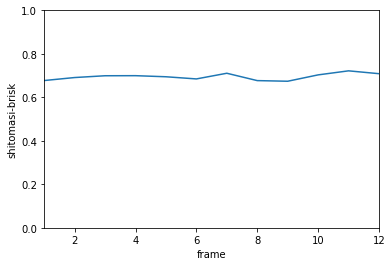

[0.49378624689312345, 0.48111658456486045, 0.4750830564784053, 0.47058823529411764, 0.47680412371134023, 0.4768153980752406, 0.476107732406603, 0.48157894736842105, 0.4749568221070812, 0.4662045060658579, 0.468615649183147, 0.48586118251928023]


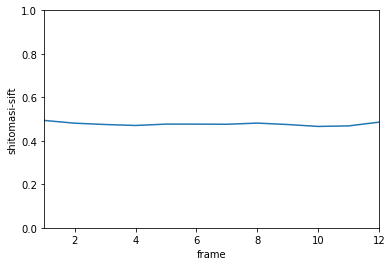

[0.6826815642458101, 0.7069351230425056, 0.7198177676537585, 0.7237762237762237, 0.7139507620164126, 0.7043580683156655, 0.7300242130750605, 0.6928487690504103, 0.6956521739130435, 0.730723606168446, 0.7463768115942029, 0.7202881152460985]


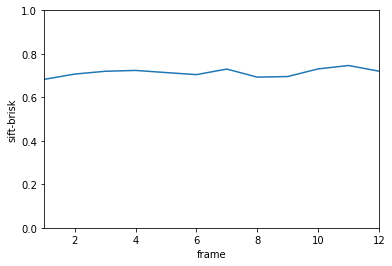

In [11]:
processFrames(videoCapture)